CIFAR-100 DATA VISUALISATION PART

The plan for Data Preparation(Visualisation) part :
 <br> 
>In this part we will take a look on what data we are using?
 <br> 
 >How it look like?
 <br> 
>What distribution this data undergoes?
 <br> 
>Analitics of the tabular representation of our data.
 <br> 
>Searching for NULL or missing values.
 <br> 
>Normalization and Standartization processes
 <br> 
>Sketching analytical graphs

                                 Analitics of normalized and augumented data                                                      

Loading train/test loader in order to perform analysis on normalized and augumented data <br>with necessary modules for its visualisation

In [124]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from data_cifar_100 import train_loader, train_set, test_loader, validation_set

Printing the appropriate sizes of traing sets

In [109]:
print(f"The size of training set is {len(train_set)} samples")
print(f"The size of validation set is {len(validation_set)} samples")

The size of training set is 45000 samples
The size of validation set is 5000 samples


Splitting training dataset to the features and targets(labels) for further analytics of the raw data

In [125]:
train_data = train_set.dataset.data
train_labels = train_set.dataset.targets

Collecting first 1000 images from train loader (transformations are applied on them e.g normalization/standartization/horizont flips) 

In [76]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

                        Plotting few examples from data loader                                                    

In [88]:
labels = train_loader.dataset.dataset.classes

label_dict = {i: name for i, name in enumerate(labels)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9372548935413361].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.905882339477539].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9490196523666382].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9921568689346314].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9647059617042542].


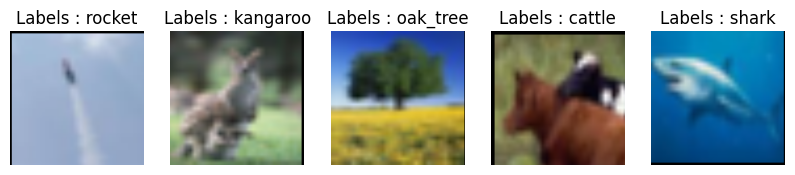

In [86]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.figure(figsize=(10,5))
for i in range(5) :
  plt.subplot(1,5,i+1)
  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 

  
  plt.axis("off")
  plt.title(f"Labels : {label_dict[y_sample[i].item()]}")
  plt.imshow(img)
plt.show()


Pixels distribution on original images from ```train_dataset```

In [33]:
red = train_data[:,:,:,0].flatten()
green = train_data[:,:,:,1].flatten()
blue = train_data[:,:,:,2].flatten()

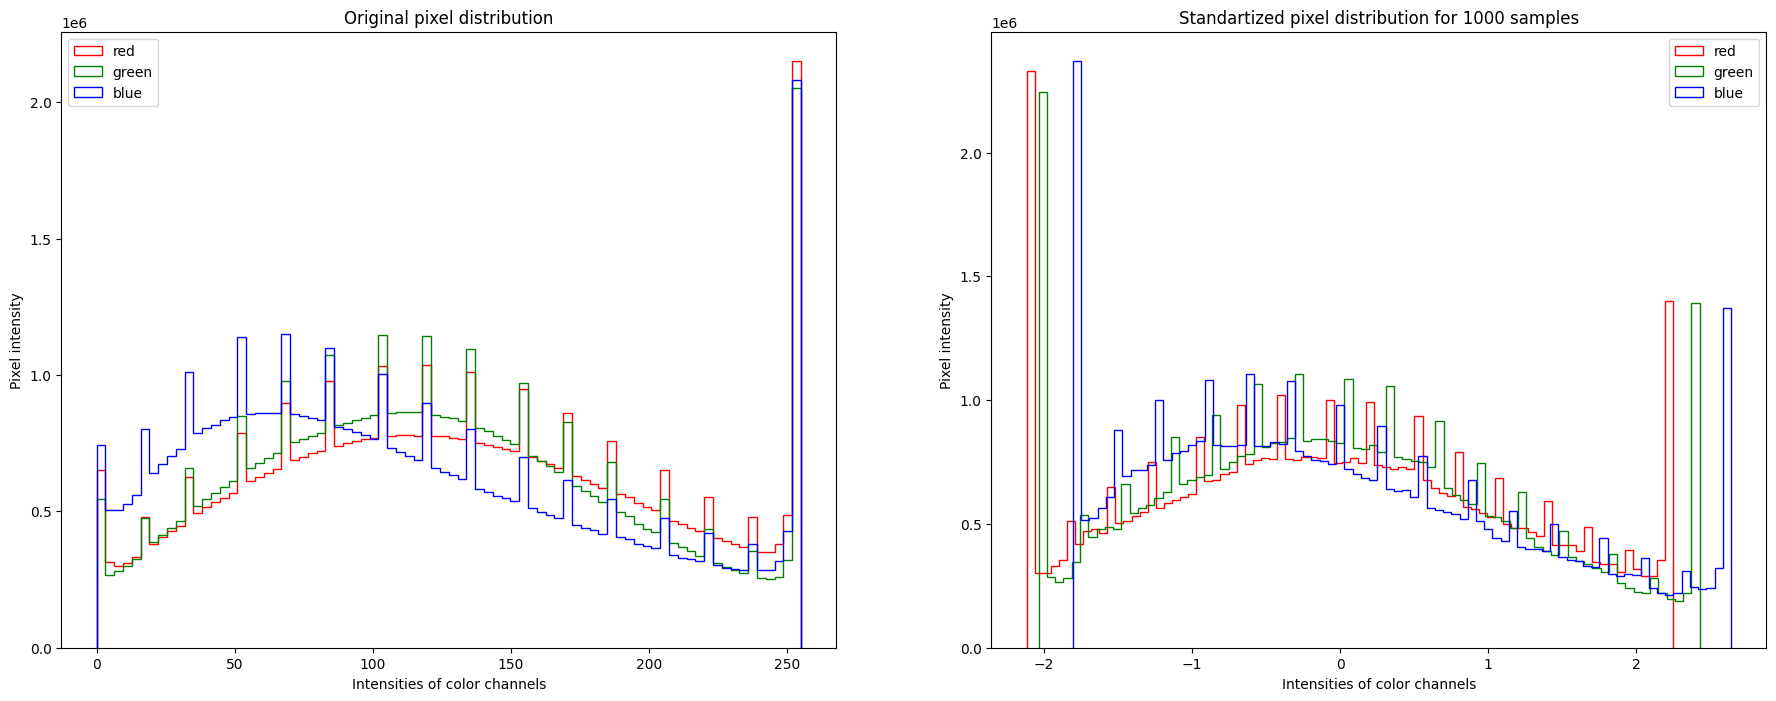

In [134]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.hist(red, bins=80,histtype="step",color="red",label="red")
plt.hist(green, bins=80,histtype="step",color="green",label="green")
plt.hist(blue, bins=80,histtype="step",color="blue",label="blue")
plt.xlabel("Intensities of color channels")
plt.title("Original pixel distribution")
plt.legend()
plt.ylabel("Pixel intensity")
plt.subplot(1,2,2)
plt.hist(red_image, bins=80,histtype="step",color="red",label="red")
plt.hist(green_image, bins=80,histtype="step",color="green",label="green")
plt.hist(blue_image, bins=80,histtype="step",color="blue",label="blue")
plt.legend()
plt.xlabel("Intensities of color channels")
plt.ylabel("Pixel intensity")
plt.title("Standartized pixel distribution for 1000 samples")
plt.show()

>As it can be seen , green and red pixels undergoes almost the same pattern, while blue pixels are shifted to the left, meaning that we have more darker blue pixels,nevertheless we have huge amount of bright pixels for all colors.

>Raw Distribution (Left): The "Original pixel distribution" illustrates the pixel intensities in their native format (0–255). The histogram reflects the natural dynamic range of the source imagery.
<br>
<br>
>Normalized Distribution (Right): The "Standardized pixel distribution". The pixel values have been rescaled to center around a mean of 0 with a standard deviation of 1, shifting the range to approximately $[-2, 2.5]$.

Bar chart for mean values for each color on pictures from not normalized dataset

In [9]:
mean = train_data.mean(axis=(0, 1, 2)) 
std = train_data.std(axis=(0, 1, 2)) 

In [35]:
red_mean = mean[0]
blue_mean = mean[2]
green_mean = mean[1]

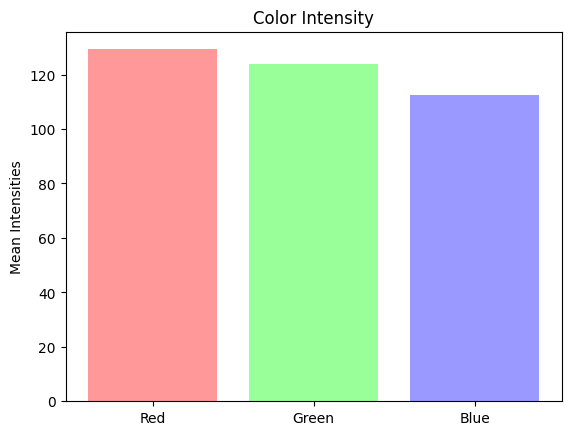

In [36]:
plt.bar( x=["Red","Green", "Blue"],height=[red_mean,green_mean,blue_mean], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

                                    Tabular representation of our data                                                           

We are reshaping train data, because DataFrame expects 2-dim input

In [37]:
train_d_reshaped = torch.from_numpy(train_data).reshape(50000,-1)


In [102]:
train_data = pd.DataFrame(train_d_reshaped)
train_targest = pd.DataFrame(train_labels, columns=["Lables"])

In [103]:
train_targest.head()

,Lables
0,19
1,29
2,0
3,11
4,1


>                 Label distribution on original dataset                     

In [112]:
target_values = train_targest.value_counts()

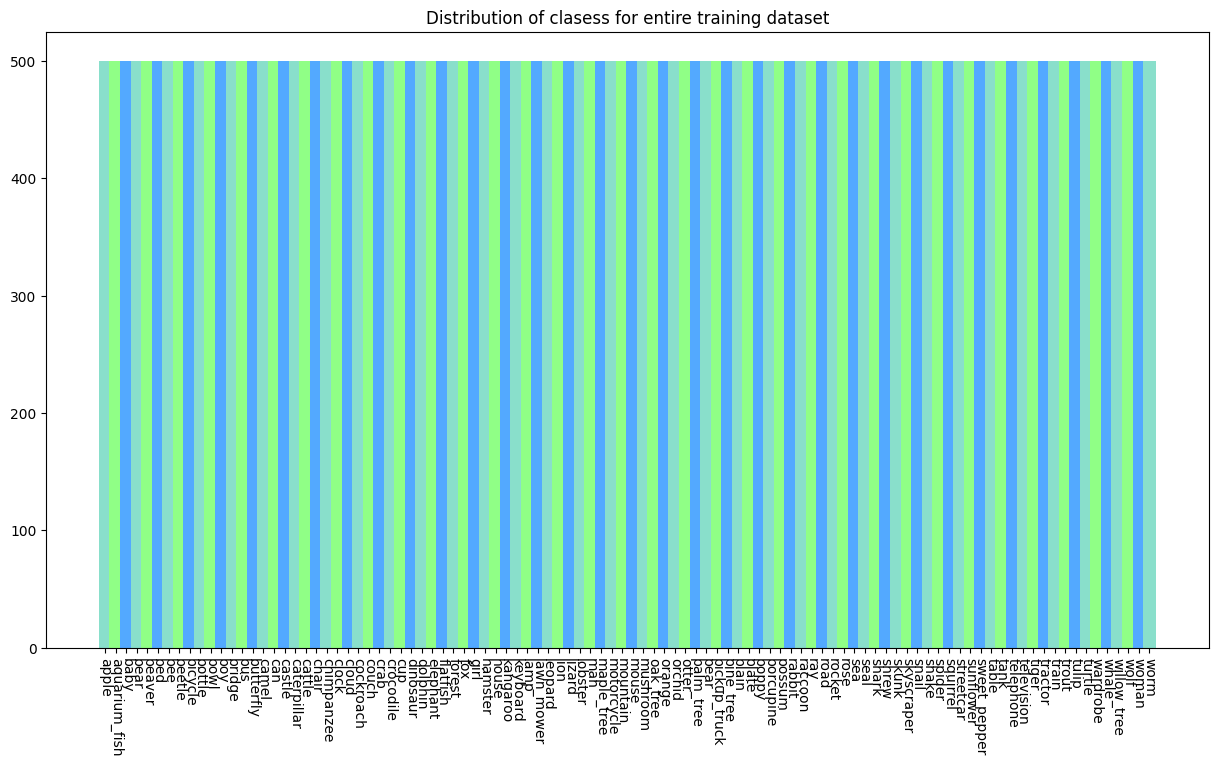

In [145]:
plt.figure(figsize=(15,8))
plt.bar(x=labels, height=target_values,color=["#89dfcb","#90ff86", "#53a9ff"],width=1.2)
plt.title("Distribution of clasess for entire training dataset")
plt.xticks(rotation=-90)
plt.show()

                    Label distribution in train_loader                     

1. We take indices of the instances in train_set which corresponds to the instances in the original train_dataset.
2. Creating a list comprehension, where we will store the appropriate lables of the desired instances.
3. We count how many times each lable occur in our list

In [127]:
train_indices = train_set.indices
train_labels_raw = [train_labels[i] for i in train_indices]
counts = [train_labels_raw.count(i) for i in range(100)]

In [140]:
train_dict = {x:y for x,y in zip(labels,counts) }

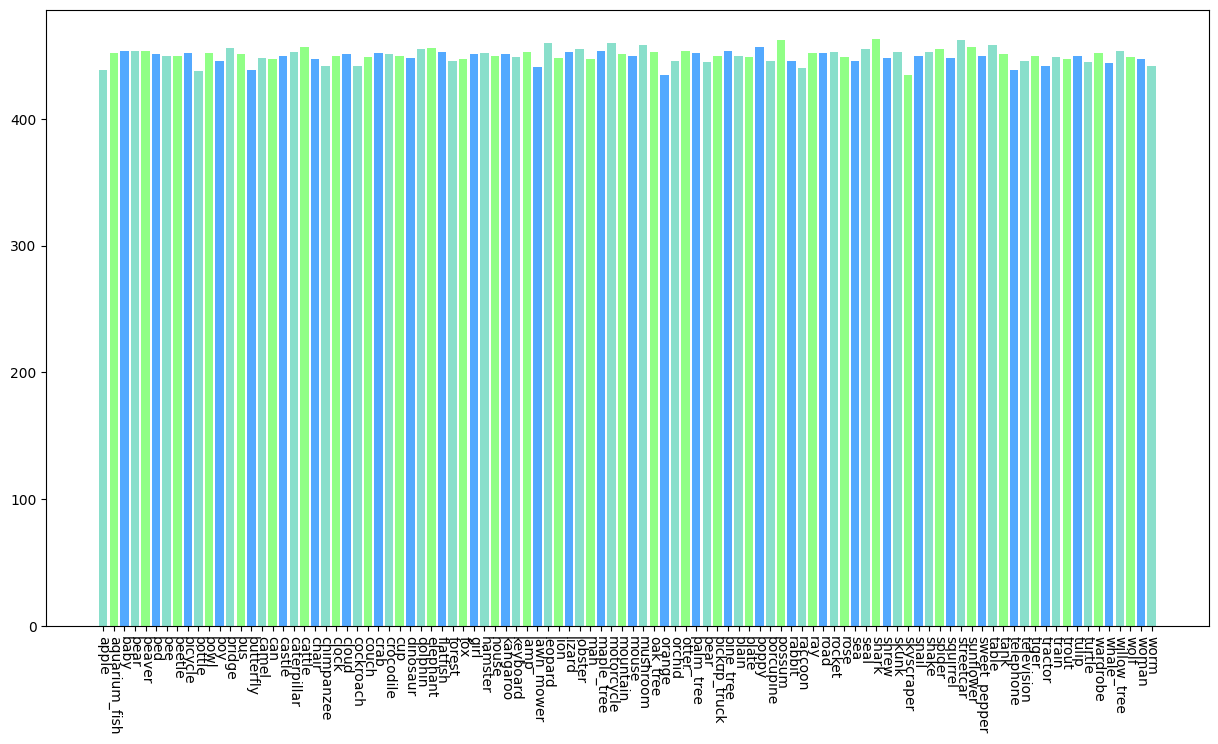

In [142]:
plt.figure(figsize=(15,8))
plt.bar(train_dict.keys(),train_dict.values(),color=["#89dfcb","#90ff86", "#53a9ff"])
plt.xticks(rotation=-90)
plt.show()

Tabular analytics of original training dataset

In [106]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,4,34,36,10,105,133,59,138,173,79
1,255,255,255,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,255,255,255
2,250,250,248,248,249,243,247,248,239,248,...,190,219,209,194,223,216,207,232,230,228
3,124,194,221,131,202,228,135,206,228,138,...,223,230,237,232,243,237,236,243,230,231
4,43,49,46,32,40,34,87,89,47,127,...,78,93,88,60,55,55,29,63,67,37


In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB


In [105]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,133.625820,138.897220,135.018180,133.620260,138.775640,134.77246,134.725600,139.695920,135.522380,135.45466,...,114.882480,128.734560,127.011120,115.011220,128.250380,126.764800,114.989160,128.053120,126.797400,115.323520
std,79.200295,76.739206,82.959109,78.232566,75.777258,82.16237,77.802072,75.335076,81.902624,77.53889,...,74.878401,74.018808,71.650393,75.256193,74.594984,72.219927,75.826336,75.287087,72.893317,76.474594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,77.000000,61.000000,68.000000,78.000000,61.00000,70.000000,80.000000,62.000000,71.00000,...,53.000000,69.000000,71.000000,53.000000,68.000000,70.000000,53.000000,67.000000,69.000000,52.000000
50%,130.000000,137.000000,132.000000,131.000000,138.000000,131.00000,132.000000,139.000000,133.000000,133.00000,...,102.000000,124.000000,121.000000,102.000000,122.000000,121.000000,102.000000,122.000000,120.000000,102.000000
75%,202.000000,204.250000,214.000000,200.000000,202.000000,212.00000,201.000000,203.000000,213.000000,202.00000,...,169.000000,187.000000,179.000000,169.000000,187.000000,179.000000,170.000000,188.000000,180.000000,172.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Searching for NULL values

In [109]:
train_data.isnull().sum().sum()

np.int64(0)